# Example 1. Color-Magnitude and HR diagrams with Asgaia

### <span style="color:red">Important!</span> 
Although the following functions have an optional input to plot the results, they were **not** created to make very sophisticated plots. Actually,their visualization tools were thought to give a first insight on the results.
You can create the plot you want by using the output matrix of these functions.

## 1.1 Reading the data

In [1]:
import numpy as np
import AsgaiaTools
import matplotlib.pyplot as plt

In [2]:
# Plots inserted in the page:
#%matplotlib inline

In [3]:
# Name of the file of the particles

In [4]:
filename = 'Particle_list.dat';

In [5]:
# Read the file
A = np.genfromtxt(filename, comments='#',names=True);

In [6]:
#Extract the data

In [7]:
lon = A['lon_rad'];
lat = A['lat_rad'];
dkpc = A['dist_kpc'];
metZ = A['met_Z'];
logAge = A['logAge_yrs'];
mass = A['mass_Msun'];
del(A);

## 1.2 Colour-Magnitude Diagram

**AsgaiaTools.GetCMD()** creates the Color-Magnitude Diagram using two or three bands:
 * When *bands* is a two dimensional array/list like ['band1', 'band2'] , this function computes the CMD *band2* vs B(*band1*,*band2*)-R(*band1*-*band2*).
 * When *bands* is a three dimensional array/list like ['band1', 'band2', 'band3'] , this function computes the CMD *band3* vs B(*band1*,*band2*)-R(*band1*-*band2*).

Where B(,) and R(,) stands for the bluer and redder bands; i.e. *bands* = ['U','I','V'] and *bands* = ['I','U','V'] lead to the **same** Color-Magnitude Diagram.

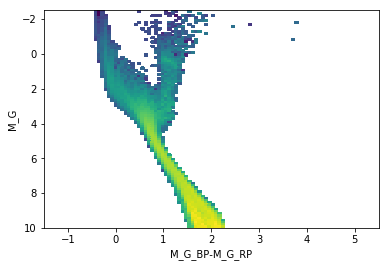

In [19]:
[cmd_map, Nobstars, Mfcis]=AsgaiaTools.GetCMD(metZ, logAge, mass,plotflag=True, IMF_type = 's',\
   bands = ['G_RP','G_BP','G'],Nbins=[100,100],mag_axis=[-1.5,5.5,-2.5,10],logoutput=True, Interp = False);

In [9]:
print 'The total mass of the particles is %f millions M0'%(mass.sum()*1E-6)
print 'The CMD contains %.3f millions stars'%(Nobstars.sum()*1E-6)

The total mass of the particles is 61.681732 millions M0
The CMD contains 42.893 millions stars


### Now with extinction and distance correction

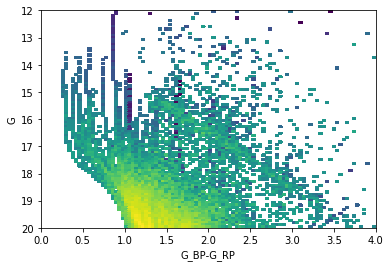

In [26]:
[cmd_map2, Nobstars2, Mfcis2] = AsgaiaTools.GetCMD(lon, lat, dkpc, metZ, logAge, mass,\
    plotflag=True, bands =['G_BP','G_RP','G'],Nbins=[100,100],mag_axis=[0.,4.,12,20],logoutput=True, Interp=False , IMF_type = 'k');

## 1.3 Hertzsprung-Russell Diagram

### Absolute magnitudes

AsgaiaTools.py:1193: RuntimeWarning: divide by zero encountered in log10
  hr_MAP = np.log10(hr_MAP);


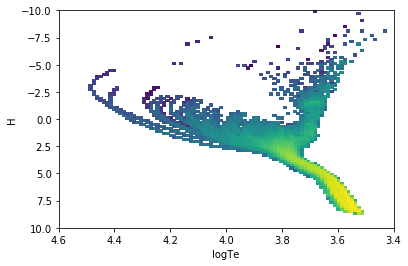

In [11]:
[hr_map, Nobstars, Mfcis]=AsgaiaTools.GetHR(metZ, logAge, mass, band = 'H',\
    IMF_type = 'k', hr_axis = [3.4, 4.6, -10.,10], plotflag=True, Nbins=[100,100],logoutput=True);

In [12]:
print 'There are %.3f million sources in the previous HR diagram'%(1e-6*Nobstars.sum())

There are 140.860 million sources in the previous HR diagram


### Aparent magnitudes

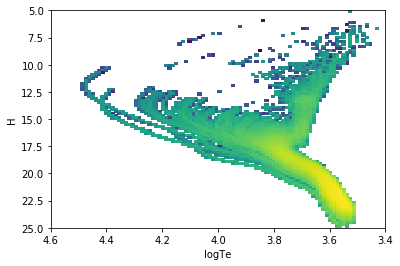

In [13]:
[hr_map, Nobstars, Mfcis]=AsgaiaTools.GetHR(lon, lat, dkpc, metZ, logAge, mass, band = 'H',\
    IMF_type = 'k', hr_axis = [3.4, 4.6, 5.,25], plotflag=True, Nbins=[100,100],logoutput=True, Interp=True);

In [14]:
print 'There are %.3f million sources in this HR diagram'%(1e-6*Nobstars.sum())

There are 140.698 million sources in this HR diagram


## 1.4 More advance diagrams

A typical Color-Magnitude Diagram represents the magnitude in one band vs the difference of two magnitudes, while in a Hertzprung-Russell diagram we ususally plot the flux in one band vs logTe (or simply Te). However, we may be interested in a plot of *logTe* vs colour (example 1.4.1), or *logTe* vs *logg* (example 1.4.2), or any other less common representation.

The *bands* parameter of the **Asgaia** functions accepts 'logTe', 'logg' and 'mbol' as inputs (although there are not physical bands). In the same way, the parameter *parameterX* of **Asgaia.GetHR()** accepts a band name (e.g. 'V' or 'G_BP').

In a more general sense, given *bands*=\['X','Y','Z'\], **Asgaia.GetCMD()** represents 'Z' vs 'X'-'Y' (or 'Y'-'X' if 'Y' is bluer), while **GetHR()** plots 'Y' vs 'X'.

### 1.4.1 Temperature vs colour

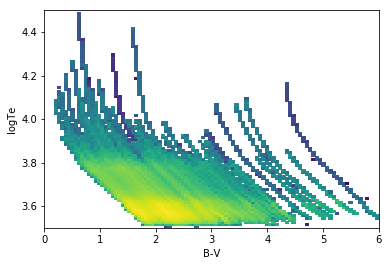

In [15]:
[cmd_map2, Nobstars2, Mfcis2] = AsgaiaTools.GetCMD(lon, lat, dkpc, metZ, logAge, mass,\
    plotflag=True, bands =['B','V','logTe'],Nbins=[100,100],mag_axis=[0.,6.,3.5,4.5],logoutput=True, Interp=False , IMF_type = 'k');

### 1.4.2 Temperature vs surface gravity

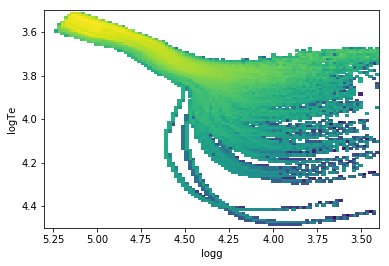

In [16]:
[hr_map, Nobstars, Mfcis]=AsgaiaTools.GetHR(lon, lat, dkpc, metZ, logAge, mass, band = 'logTe',\
    IMF_type = 'k', hr_axis = [3.4, 5.3, 3.5,4.5], plotflag=True, Nbins=[100,100],logoutput=True, Interp=True, parameterX='logg');

Both **AsgaiaTools.GetCMD()** and **AsgaiaTools.GetHR()** include the option to use your own A_V values. Just include A_V = name_of_your_extinction_array as an input of the functions